## Data Preperation


In [1]:
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
import json # library to handle JSON files
import requests # library to handle requests
import csv
import lxml.html as lh
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

#!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values


#!conda install --channel conda-forge geopandas --yes
import geopandas as gpd

#!conda install -c conda-forge folium=0.5.0 --yes
import folium # map rendering library

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt # plotting library
# backend for rendering plots within the browser
%matplotlib inline 

from sklearn.datasets.samples_generator import make_blobs


# import k-means from clustering stage
from sklearn.cluster import KMeans

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 

print('Libraries imported.')




Libraries imported.


### 1- Location

First let's download the location data and read it into a pandas dataframe.

>**Data source:** London data store - Greater London Authority  
**Source link:** https://data.london.gov.uk/dataset/postcode-directory-for-london  
**Data details:** Postcode, Latitude, Longtitude, LSOA*  
(* *A Lower Layer Super Output Area (LSOA) is a geographic area. Lower Layer Super Output Areas are a geographic hierarchy designed to improve the reporting of small area statistics in England and Wales.*)

In [2]:
loc=pd.read_csv("https://data.london.gov.uk/download/postcode-directory-for-london/fd269535-973a-418f-8847-da405687e2e2/London_postcode-ONS-postcode-Directory-May15.csv")
loc.head()

,pcd,pcd2,pcds,dointr,doterm,oscty,oslaua,osward,usertype,oseast1m,osnrth1m,osgrdind,oshlthau,hro,ctry,gor,streg,pcon,eer,teclec,ttwa,pct,nuts,psed,cened,edind,oshaprev,lea,oldha,wardc91,wardo91,ward98,statsward,oa01,casward,park,lsoa01,msoa01,ur01ind,oac01,oldpct,oa11,lsoa11,msoa11,parish,wz11,ccg,bua11,buasd11,ru11ind,oac11,lat,long
0,BR1 1AA,BR1 1AA,BR1 1AA,199002,200812,E99999999,E09000006,E05000109,1,540260,169398,1,E18000007,E19000003,E92000001,E12000007,5,E14000604,E15000007,E24000016,E30000082,E16000004,E05000109,01AFFR19,AUFR19,1,Q07,30,QEY,02AUFR,01AFFR,00AFFR,00AFGG,E00003255,00AFG,E99999999,E01000676,E02000134,5,7A3,5A7,E00003255,E01000676,E02000134,E43000196,E33029192,E38000023,E34004707,E35000434,,2D1,51.406271,0.015177
1,BR1 1AB,BR1 1AB,BR1 1AB,201203,,E99999999,E09000006,E05000109,0,540260,169398,1,E18000007,E19000003,E92000001,E12000007,5,E14000604,E15000007,E24000016,E30000082,E16000004,E05000109,01AFFR19,AUFR19,1,Q07,30,QEY,02AUFR,01AFFR,00AFFR,00AFGG,E00003255,00AFG,E99999999,E01000676,E02000134,5,7A3,5A7,E00003255,E01000676,E02000134,E43000196,E33029192,E38000023,E34004707,E35000434,,2D1,51.406271,0.015177
2,BR1 1AD,BR1 1AD,BR1 1AD,201409,,E99999999,E09000006,E05000109,1,540383,168708,1,E18000007,E19000003,E92000001,E12000007,5,E14000604,E15000007,E24000016,E30000082,E16000004,E05000109,01AFGA17,AUGA17,1,Q07,30,QEY,02AUGA,01AFGA,00AFGA,00AFGG,E00003264,00AFG,E99999999,E01000675,E02000144,5,2B2,5A7,E00003264,E01000675,E02000144,E43000196,E33029199,E38000023,E34004707,E35000434,,4C3,51.400040,0.016671
3,BR1 1AE,BR1 1AE,BR1 1AE,200808,,E99999999,E09000006,E05000109,0,540194,169201,1,E18000007,E19000003,E92000001,E12000007,5,E14000604,E15000007,E24000016,E30000082,E16000004,E05000109,01AFFR19,AUFR19,1,Q07,30,QEY,02AUFR,01AFFR,00AFFR,00AFGG,E00003266,00AFG,E99999999,E01000677,E02000144,5,2B2,5A7,E00003266,E01000677,E02000144,E43000196,E33029200,E38000023,E34004707,E35000434,,2D1,51.404517,0.014151
4,BR1 1AX,BR1 1AX,BR1 1AX,200106,200610,E99999999,E09000006,E05000109,1,540421,169620,1,E18000007,E19000003,E92000001,E12000007,5,E14000604,E15000007,E24000016,E30000082,E16000004,E05000109,01AFFX24,AUFX24,1,Q07,30,QEY,02AUFX,01AFFX,00AFFX,00AFGG,E00003250,00AFG,E99999999,E01000676,E02000134,5,2A2,5A7,E00003250,E01000676,E02000134,E43000196,E33029181,E38000023,E34004707,E35000434,,2D1,51.408226,0.017578


Let's drop unnecessary columns

In [3]:
loc.rename(columns = {'pcd': 'Postcode','oa11': 'LSOA2','lsoa11': 'LSOA', 'lat' : 'Latitude', 'long': 'Longitude'} ,inplace = True)
loc=loc[['Postcode','LSOA','LSOA2', 'Latitude', 'Longitude']]
loc.head()

,Postcode,LSOA,LSOA2,Latitude,Longitude
0,BR1 1AA,E01000676,E00003255,51.406271,0.015177
1,BR1 1AB,E01000676,E00003255,51.406271,0.015177
2,BR1 1AD,E01000675,E00003264,51.400040,0.016671
3,BR1 1AE,E01000677,E00003266,51.404517,0.014151
4,BR1 1AX,E01000676,E00003250,51.408226,0.017578


In [4]:
len(loc)

312430

In [5]:
loc = loc.sort_values('LSOA', ascending=False)
loc= loc.drop_duplicates(subset='LSOA', keep='first')
len(loc)

4835

In [6]:
map_df = gpd.read_file("https://opendata.arcgis.com/datasets/da831f80764346889837c72508f046fa_3.geojson")
# check data type so we can see that this is not a normal dataframe, but a GEOdataframe
map_df.head()

,objectid,lsoa11cd,lsoa11nm,lsoa11nmw,st_areashape,st_lengthshape,geometry
0,1,E01013150,North East Lincolnshire 013B,North East Lincolnshire 013B,2.842166e+05,2286.649368,POLYGON ((-0.1361269459310195 53.5564371900317...
1,2,E01015580,Swindon 007D,Swindon 007D,4.534211e+05,3426.828755,POLYGON ((-1.785727243039375 51.57653396919847...
2,3,E01023601,North Hertfordshire 010A,North Hertfordshire 010A,2.801437e+05,2228.370570,POLYGON ((-0.2742822481507952 51.9490044407343...
3,4,E01024217,Dover 005B,Dover 005B,7.351294e+06,13012.376562,"POLYGON ((1.40257897665496 51.23871265508399, ..."
4,5,E01000722,Bromley 023A,Bromley 023A,5.691620e+05,3524.308527,POLYGON ((0.1146063324029615 51.39254569837126...


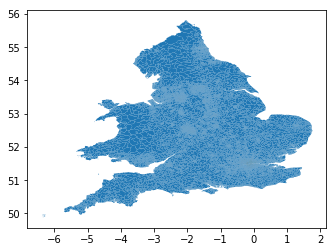

In [7]:
#Now let’s preview what our map looks like with no data in it.
map_df.rename(columns = {'lsoa11cd': 'LSOA'} ,inplace = True)
map_df.plot()

In [8]:
# join the geodataframe with location data
location = map_df.set_index("LSOA").join(loc.set_index("LSOA"))
#location= pd.merge(loc, map_df, how='left', on='LSOA')
location.head()

,objectid,lsoa11nm,lsoa11nmw,st_areashape,st_lengthshape,geometry,Postcode,LSOA2,Latitude,Longitude
LSOA,,,,,,,,,,
E01013150,1,North East Lincolnshire 013B,North East Lincolnshire 013B,2.842166e+05,2286.649368,POLYGON ((-0.1361269459310195 53.5564371900317...,NaN,NaN,NaN,NaN
E01015580,2,Swindon 007D,Swindon 007D,4.534211e+05,3426.828755,POLYGON ((-1.785727243039375 51.57653396919847...,NaN,NaN,NaN,NaN
E01023601,3,North Hertfordshire 010A,North Hertfordshire 010A,2.801437e+05,2228.370570,POLYGON ((-0.2742822481507952 51.9490044407343...,NaN,NaN,NaN,NaN
E01024217,4,Dover 005B,Dover 005B,7.351294e+06,13012.376562,"POLYGON ((1.40257897665496 51.23871265508399, ...",NaN,NaN,NaN,NaN
E01000722,5,Bromley 023A,Bromley 023A,5.691620e+05,3524.308527,POLYGON ((0.1146063324029615 51.39254569837126...,BR5 2EE,E00003519,51.389834,0.107552


In [9]:
len(location)

34753

In [10]:
location= location.dropna()
len(location)

4835

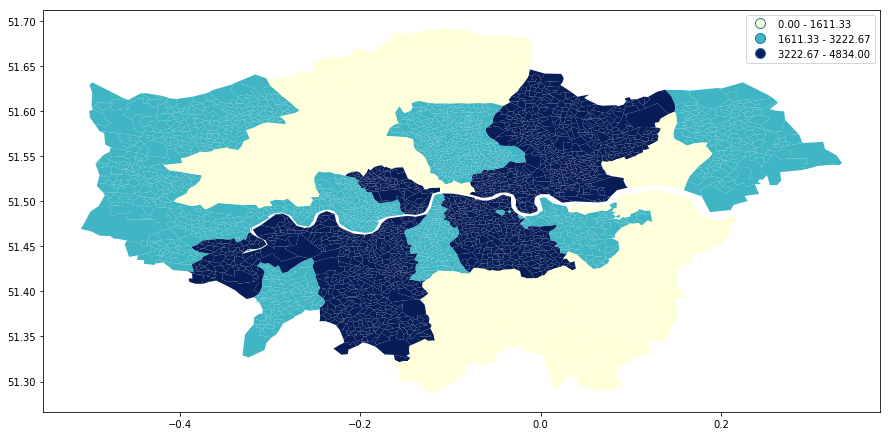

In [11]:
location_map = location.plot(column='lsoa11nm', cmap =    
                                'YlGnBu', figsize=(15,9),   
                                 scheme='quantiles', k=3, legend =  
                                  True);

In [12]:
location.to_csv('location.csv')
print("csv saved")

csv saved


### 2- Crime

>**Data source:** London data store , Greater London Authority   
**Source link:** https://data.london.gov.uk/dataset/recorded_crime_summary  
**Data details:**  MPS Borough Level Crime (most recent 24 months) , MPS LSOA Level Crime (most recent 24 months) 

In [13]:
crime=pd.read_csv("https://data.london.gov.uk/download/recorded_crime_summary/644a9e0d-75a3-4c3a-91ad-03d2a7cb8f8e/MPS%20LSOA%20Level%20Crime%20%28most%20recent%2024%20months%29.csv")
crime.head()

,LSOA Code,Borough,Major Category,Minor Category,201710,201711,201712,201801,201802,201803,201804,201805,201806,201807,201808,201809,201810,201811,201812,201901,201902,201903,201904,201905,201906,201907,201908,201909
0,E01000006,Barking and Dagenham,Arson and Criminal Damage,Arson,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,E01000007,Barking and Dagenham,Arson and Criminal Damage,Arson,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,E01000008,Barking and Dagenham,Arson and Criminal Damage,Arson,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,E01000009,Barking and Dagenham,Arson and Criminal Damage,Arson,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,E01000010,Barking and Dagenham,Arson and Criminal Damage,Arson,0,0,0,0,0,0,0,0,2,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0


In [14]:
crime.rename(columns = {'LSOA Code': 'LSOA'} ,inplace = True)
crime['Sum_Crime'] =crime.sum(axis=1)
crime=crime [['Borough','LSOA','Sum_Crime']]
crime.head()

,Borough,LSOA,Sum_Crime
0,Barking and Dagenham,E01000006,1
1,Barking and Dagenham,E01000007,1
2,Barking and Dagenham,E01000008,2
3,Barking and Dagenham,E01000009,2
4,Barking and Dagenham,E01000010,6


In [15]:
crime_2=crime.groupby(['LSOA'])['Sum_Crime'].sum().reset_index()
crime_2.head()

,LSOA,Sum_Crime
0,E01000006,203
1,E01000007,868
2,E01000008,399
3,E01000009,500
4,E01000010,2669


In [16]:
crime_2.describe()

,Sum_Crime
count,4829.000000
mean,343.855664
std,532.046147
min,43.000000
25%,167.000000
50%,237.000000
75%,360.000000
max,14935.000000


In order to calculate crime per 1000 person, we will pull LSOA level population data

>**Data source:** London data store , Greater London Authority  
**Source link:** https://data.london.gov.uk/dataset/lsoa-atlas  
**Data details:**  LSOA Level population data to calculate crime rate per population ,Current LSOA boundaries post 2011

In [17]:
population=pd.read_excel("https://data.london.gov.uk/download/lsoa-atlas/b8e01c3a-f5e3-4417-82b3-02ad271e6ee8/lsoa-data.xls", header=1)
population.head()

,Unnamed: 0,Unnamed: 1,All Ages,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Aged 0-15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Aged 16-29,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Aged 30-44,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Aged 45-64,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Aged 65+,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76,Unnamed: 77,Unnamed: 78,Unnamed: 79,Working-age,Unnamed: 81,Unnamed: 82,Unnamed: 83,Unnamed: 84,Unnamed: 85,Unnamed: 86,Unnamed: 87,Unnamed: 88,Unnamed: 89,Unnamed: 90,Unnamed: 91,Unnamed: 92,Age Structure,Unnamed: 94,Unnamed: 95,Unnamed: 96,Unnamed: 97,Unnamed: 98,Unnamed: 99,Area (Hectares),Persons per hectare,Unnamed: 102,All households,Couple household with dependent children,Couple household without dependent children,Lone parent household,One person household,Other household Types,% Couple household with dependent children,% Couple household without dependent children,% Lone parent household,% One person household,% Other multi person household,White,Mixed/multiple ethnic groups,Asian/Asian British,Black/African/Caribbean/Black British,Other ethnic group,BAME,White (%),Mixed/multiple ethnic groups (%),Asian/Asian British (%),Black/African/Caribbean/Black British (%),Other ethnic group (%),BAME (%),United Kingdom,Not United Kingdom,% United Kingdom,% Not United Kingdom,Households with at least one person aged 16 or over with English as a main language,Households where no people aged 16 or over have English as a main language,% of households with at least one person aged 16 or over with English as a main language,% of households where no people aged 16 or over have English as a main language,Christian,Buddhist,Hindu,Jewish,Muslim,Sikh,Other religion,No religion,Religion not stated,Christian (%),Buddhist (%),Hindu (%),Jewish (%),Muslim (%),Sikh (%),Other religion (%),No religion (%),Religion not stated (%),Owned outright,Owned with a mortgage or loan,Social rented,Private rented,Owned outright (%),Owned with a mortgage or loan (%),Social rented (%),Private rented (%),All Households,Household spaces with at least one usual resident,Household spaces with no usual residents,Whole house or bungalow: Detached,Whole house or bungalow: Semi-detached,Whole house or bungalow: Terraced (including end-terrace),"Flat, maisonette or apartment",Household spaces with at least one usual resident (%),Household spaces with no usual residents (%),Whole house or bungalow: Detached (%),Whole house or bungalow: Semi-detached (%),Whole house or bungalow: Terraced (including end-terrace) (%),"Flat, maisonette or apartment (%)",Median Price (£),Unnamed: 174,Unnamed: 175,Unnamed: 176,Unnamed: 177,Unnamed: 178,Sales,Unnamed: 180,Unnamed: 181,Unnamed: 182,Unnamed: 183,Unnamed: 184
0,Codes,Names,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,All Ages,0-15,16-29,30-44,45-64,65+,Working-age,NaN,2012.000000,2013.000000,2011,2011,2011,2011,2011,2011,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011,2011,2011,2011,2011,2011,2011.000000,2011.000000,2011.00

In [18]:
population=population[['Unnamed: 0', 'Unnamed: 14']]
population=population.drop(population.index[0]).reset_index(drop=True)
population.rename(columns = {'Unnamed: 0' : 'LSOA','Unnamed: 14': 'Population'} ,inplace = True)
population.head()

,LSOA,Population
0,E01000907,1466
1,E01000908,1647
2,E01000909,1642
3,E01000912,1653
4,E01000913,1827


In [19]:
population.describe()

,Population
count,4835.000000
mean,1740.751810
std,304.551285
min,965.000000
25%,1550.000000
50%,1690.000000
75%,1878.000000
max,6139.000000


Lets calculate crime per person for each LSOA

In [20]:
crime_per_pop= pd.merge(crime_2, population, how='left', on='LSOA')
crime_per_pop.head(10)

,LSOA,Sum_Crime,Population
0,E01000006,203,1714
1,E01000007,868,1525
2,E01000008,399,1595
3,E01000009,500,1737
4,E01000010,2669,3199
5,E01000011,192,1596
6,E01000012,262,1937
7,E01000013,632,1684
8,E01000014,234,1645
9,E01000015,238,2404


In [21]:
crime_per_pop ['crime_per_1000'] = crime_per_pop ['Sum_Crime'] / crime_per_pop ['Population'] *1000 /2
crime_per_pop=crime_per_pop.drop(columns=['Sum_Crime','Population'])
crime_per_pop.head()

,LSOA,crime_per_1000
0,E01000006,59.218203
1,E01000007,284.590164
2,E01000008,125.078370
3,E01000009,143.926310
4,E01000010,417.161613


In [22]:
crime_per_pop.describe()

,crime_per_1000
count,4829.000000
mean,96.590116
std,153.278908
min,15.472779
25%,50.326797
50%,69.258809
75%,100.428495
max,6259.430008


merge with Post code data

In [23]:
crime_df= pd.merge(location, crime_per_pop, how='right', on='LSOA')
crime_df.set_index('LSOA', inplace=True)
crime_df.head(10)

,objectid,lsoa11nm,lsoa11nmw,st_areashape,st_lengthshape,geometry,Postcode,LSOA2,Latitude,Longitude,crime_per_1000
LSOA,,,,,,,,,,,
E01000722,5,Bromley 023A,Bromley 023A,569162.040237,3524.308527,POLYGON ((0.1146063324029615 51.39254569837126...,BR5 2EE,E00003519,51.389834,0.107552,142.118077
E01033603,31,Westminster 009I,Westminster 009I,26843.034373,769.684192,POLYGON ((-0.1651940481248741 51.5223349961171...,NW1 5DF,E00023578,51.521158,-0.167708,119.116582
E01003626,37,Newham 015B,Newham 015B,84191.765717,1413.516140,POLYGON ((0.05359712608222828 51.5390032900314...,E6 2AG,E00018285,51.540082,0.057697,76.309068
E01003989,38,Southwark 018C,Southwark 018C,242134.008988,2505.869788,POLYGON ((-0.05785501055406365 51.484316385276...,SE151RZ,E00020073,51.480043,-0.064614,125.125125
E01004197,41,Tower Hamlets 002A,Tower Hamlets 002A,204102.320562,1785.985330,POLYGON ((-0.0525324737766623 51.5348034485191...,E2 9HJ,E00021170,51.533201,-0.053391,173.251178
E01001673,46,Greenwich 006B,Greenwich 006B,226060.615030,2789.836033,POLYGON ((0.09484693935418946 51.4885192027030...,SE181SA,E00008340,51.489438,0.086516,128.042843
E01004606,53,Wandsworth 006C,Wandsworth 006C,107761.925014,1280.073556,POLYGON ((-0.2180430017167896 51.4681048674990...,SW151DP,E00023217,51.466894,-0.222404,76.807229
E01001213,54,Ealing 023A,Ealing 023A,154721.816410,2166.780492,POLYGON ((-0.3755564245671254 51.5159920006656...,UB1 2JD,E00006077,51.513974,-0.375832,57.197592
E01003600,67,Newham 021B,Newham 021B,118103.947863,1640.480770,POLYGON ((0.02202825545997067 51.5323325034078...,E13 9HJ,E00018126,51.529516,0.025156,71.084337


In [24]:
# join the geodataframe with crime data
#crime_index = location.set_index("LSOA").join(crime_per_pop.set_index("LSOA"))
#location= pd.merge(loc, map_df, how='left', on='LSOA')
#crime_index.head()

In [25]:
crime_df.to_csv('crime_per_pop.csv')
crime_df.describe()

,objectid,st_areashape,st_lengthshape,Latitude,Longitude,crime_per_1000
count,4829.000000,4.829000e+03,4829.000000,4829.000000,4829.000000,4829.000000
mean,17316.358252,3.253017e+05,2373.204752,51.505927,-0.117892,96.590116
std,9904.363015,6.353839e+05,1447.952069,0.075582,0.155099,153.278908
min,5.000000,2.384727e+03,410.093838,51.298747,-0.496741,15.472779
25%,8678.000000,1.276122e+05,1570.798602,51.452695,-0.217431,50.326797
50%,17323.000000,2.011406e+05,2036.519298,51.512905,-0.114275,69.258809
75%,25938.000000,3.262734e+05,2713.056325,51.562570,-0.015706,100.428495
max,34751.000000,1.590369e+07,21342.177910,51.682138,0.309367,6259.430008


In [26]:
#count NaN values in every column of df
len(crime_df) - crime_df.count()

objectid          0
lsoa11nm          0
lsoa11nmw         0
st_areashape      0
st_lengthshape    0
geometry          0
Postcode          0
LSOA2             0
Latitude          0
Longitude         0
crime_per_1000    0
dtype: int64

In [27]:
crime_per_pop= crime_per_pop.dropna()
len(crime_per_pop)

4829

Text(0.1, 0.08, 'Source: London Datastore, 2014')

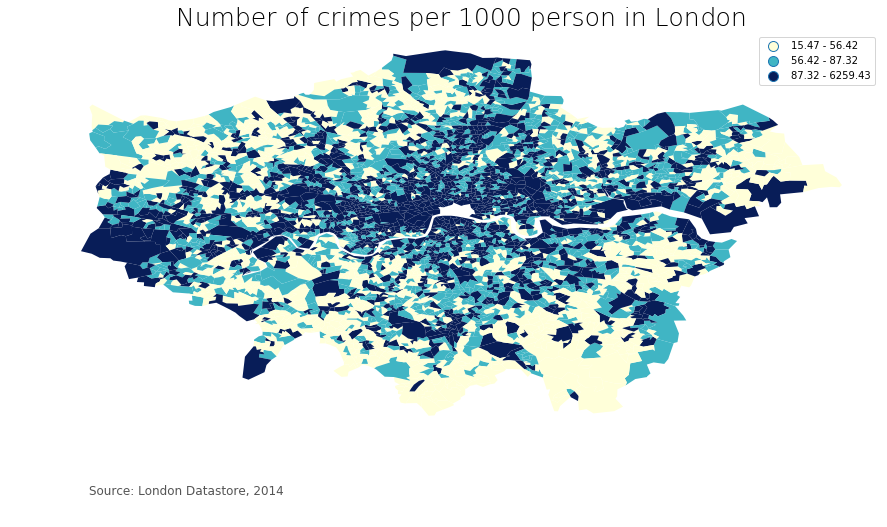

In [28]:
crime_map= crime_df.plot(column='crime_per_1000', cmap =    
                                'YlGnBu', figsize=(15,9),   
                                 scheme='quantiles', k=3, legend =  
                                  True);

#remove axis
crime_map.axis('off')
# add a title
crime_map.set_title('Number of crimes per 1000 person in London', fontdict={'fontsize': '25', 'fontweight' : '3'})
# create an annotation for the data source
crime_map.annotate('Source: London Datastore, 2014',xy=(0.1, .08),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')

In [29]:
#obtain latitude and longitude for London
address = 'London'

geolocator = Nominatim(user_agent="to_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of London are {}, {}.'.format(latitude, longitude))


The geograpical coordinate of London are 51.5073219, -0.1276474.


In [30]:
crime_map2 = folium.Map(location=[latitude, longitude], zoom_start=10)

for lat, lng, Postcode, Crime in zip(crime_df['Latitude'], crime_df['Longitude'], crime_df['Postcode'], crime_df['crime_per_1000']):
    label = '{}: Crime: {}'.format(Postcode, Crime)
    label = folium.Popup(label, parse_html=True)
    if int(Crime) < 69:
        color="green" 
    elif int(Crime) >  100:
        color = "red"
    else: 
        color="yellow"
    folium.CircleMarker(
        [lat, lng],
        radius=2,
        popup=label,
        color=color,
        fill=True,
        fill_opacity=0.7,
        parse_html=False).add_to(crime_map2)  

crime_map2.save('crime_map2.html')

### 3-Commuting duration to Bank station

>**Data source:** London data store , Greater London Authority   
**Source link:** https://data.london.gov.uk/download/mylondon/c2e9ebc1-935b-460c-9361-293398d84fe5/MyLondon_traveltime_to_Bank_station_OA.csv  
**Data details:** 

In [31]:
commute=pd.read_csv("https://data.london.gov.uk/download/mylondon/c2e9ebc1-935b-460c-9361-293398d84fe5/MyLondon_traveltime_to_Bank_station_OA.csv")
commute.head()

,OA11CD,driving_distance_miles,driving_time_mins,public_transport_time_mins,cycling_distance_miles,cycling_time_mins,walking_distance_miles,walking_time_mins
0,E00000001,0.86,6,16,0.83,6,0.80,16
1,E00000003,0.99,7,14,0.98,7,0.73,14
2,E00000005,0.86,6,13,0.83,6,0.65,13
3,E00000007,0.64,5,10,0.61,4,0.51,10
4,E00000010,0.93,6,17,0.88,6,0.85,17


In [32]:
commute.rename(columns = {'OA11CD': 'LSOA2'} ,inplace = True)
commute=commute[['LSOA2', 'public_transport_time_mins']]
commute.head()

,LSOA2,public_transport_time_mins
0,E00000001,16
1,E00000003,14
2,E00000005,13
3,E00000007,10
4,E00000010,17


In [33]:
commute.describe()

,public_transport_time_mins
count,25053.000000
mean,51.111763
std,15.215065
min,0.000000
25%,40.000000
50%,50.000000
75%,61.000000
max,120.000000


In [34]:
crime_commute= pd.merge(crime_df, commute, how='right', on='LSOA2') 
crime_commute.head(10)

,objectid,lsoa11nm,lsoa11nmw,st_areashape,st_lengthshape,geometry,Postcode,LSOA2,Latitude,Longitude,crime_per_1000,public_transport_time_mins
0,5.0,Bromley 023A,Bromley 023A,569162.040237,3524.308527,POLYGON ((0.1146063324029615 51.39254569837126...,BR5 2EE,E00003519,51.389834,0.107552,142.118077,65
1,31.0,Westminster 009I,Westminster 009I,26843.034373,769.684192,POLYGON ((-0.1651940481248741 51.5223349961171...,NW1 5DF,E00023578,51.521158,-0.167708,119.116582,33
2,37.0,Newham 015B,Newham 015B,84191.765717,1413.516140,POLYGON ((0.05359712608222828 51.5390032900314...,E6 2AG,E00018285,51.540082,0.057697,76.309068,40
3,38.0,Southwark 018C,Southwark 018C,242134.008988,2505.869788,POLYGON ((-0.05785501055406365 51.484316385276...,SE151RZ,E00020073,51.480043,-0.064614,125.125125,39
4,41.0,Tower Hamlets 002A,Tower Hamlets 002A,204102.320562,1785.985330,POLYGON ((-0.0525324737766623 51.5348034485191...,E2 9HJ,E00021170,51.533201,-0.053391,173.251178,30
5,46.0,Greenwich 006B,Greenwich 006B,226060.615030,2789.836033,POLYGON ((0.09484693935418946 51.4885192027030...,SE181SA,E00008340,51.489438,0.086516,128.042843,52
6,53.0,Wandsworth 006C,Wandsworth 006C,107761.925014,1280.073556,POLYGON ((-0.2180430017167896 51.4681048674990...,SW151DP,E00023217,51.466894,-0.222404,76.807229,50
7,54.0,Ealing 023A,Ealing 023A,154721.816410,2166.780492,POLYGON ((-0.3755564245671254 51.5159920006656...,UB1 2JD,E00006077,51.513974,-0.375832,57.197592,69
8,67.0,Newham 021B,Newham 021B,118103.947863,1640.480770,POLYGON ((0.02202825545997067 51.5323325034078...,E13 9HJ,E00018126,51.529516,0.025156,71.084337,37
9,68.0,Tower Hamlets 030B,Tower Hamlets 030B,88757.869289,1236.750901,POLYGON ((-0.005912793758553197 51.49551231852...,E14 3HS,E00021258,51.492265,-0.007741,39.250146,51


In [35]:
crime_commute.describe()

,objectid,st_areashape,st_lengthshape,Latitude,Longitude,crime_per_1000,public_transport_time_mins
count,4829.000000,4.829000e+03,4829.000000,4829.000000,4829.000000,4829.000000,25053.000000
mean,17316.358252,3.253017e+05,2373.204752,51.505927,-0.117892,96.590116,51.111763
std,9904.363015,6.353839e+05,1447.952069,0.075582,0.155099,153.278908,15.215065
min,5.000000,2.384727e+03,410.093838,51.298747,-0.496741,15.472779,0.000000
25%,8678.000000,1.276122e+05,1570.798602,51.452695,-0.217431,50.326797,40.000000
50%,17323.000000,2.011406e+05,2036.519298,51.512905,-0.114275,69.258809,50.000000
75%,25938.000000,3.262734e+05,2713.056325,51.562570,-0.015706,100.428495,61.000000
max,34751.000000,1.590369e+07,21342.177910,51.682138,0.309367,6259.430008,120.000000


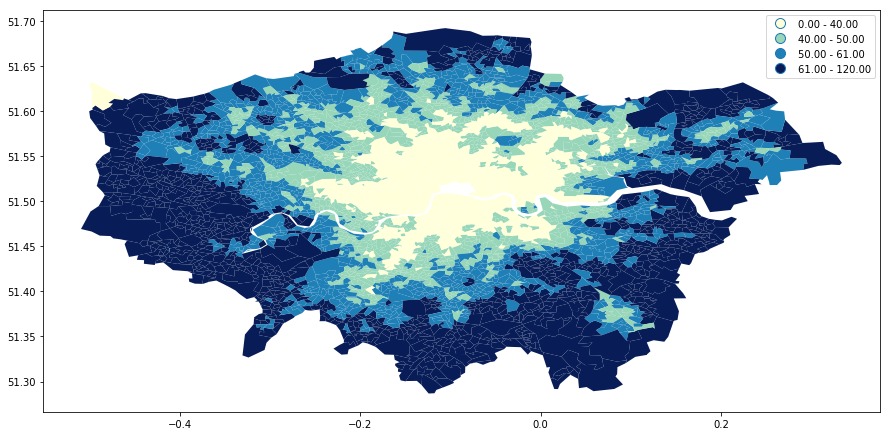

In [36]:
commute_map= crime_commute.plot(column='public_transport_time_mins', cmap =    
                                'YlGnBu', figsize=(15,9),   
                                 scheme='quantiles', k=4, legend =  
                                  True);

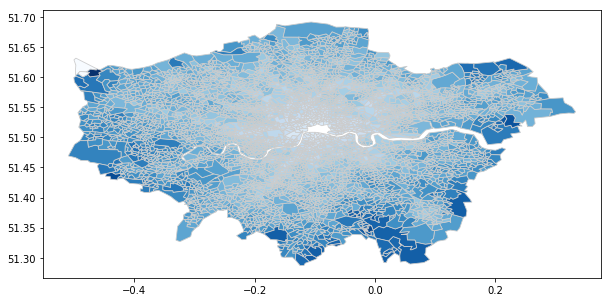

In [37]:
# set a variable that will call whatever column we want to visualise on the map
variable = 'public_transport_time_mins'
# set the range for the choropleth
vmin, vmax = 120, 220
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 6))
#df3.plot(variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8', colorbar=False)
crime_commute.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')
#df3.plot(column='crime_per_1000', scheme='QUANTILES', k=3, colormap='OrRd', linewidth=0.1)

### 4-Nearby Parks and supermarkets


#### Parks
>**Data source:** Foursquare API  
**Foursquare Category Id:** 4bf58dd8d48988d163941735  


#### Supermarkets
>**Data source:** Foursquare API  
**Foursquare Category Id:** Supermarket :52f2ab2ebcbc57f1066b8b46 , Grocery store: 4bf58dd8d48988d118951735, Market: 50be8ee891d4fa8dcc7199a7  

In [52]:
# The code was removed by Watson Studio for sharing.

In [40]:
crime_commute['Park'] = ''
crime_commute['Supermarket'] = ''
crime_commute.head()

,objectid,lsoa11nm,lsoa11nmw,st_areashape,st_lengthshape,geometry,Postcode,LSOA2,Latitude,Longitude,crime_per_1000,public_transport_time_mins,Park,Supermarket
0,5.0,Bromley 023A,Bromley 023A,569162.040237,3524.308527,POLYGON ((0.1146063324029615 51.39254569837126...,BR5 2EE,E00003519,51.389834,0.107552,142.118077,65,,
1,31.0,Westminster 009I,Westminster 009I,26843.034373,769.684192,POLYGON ((-0.1651940481248741 51.5223349961171...,NW1 5DF,E00023578,51.521158,-0.167708,119.116582,33,,
2,37.0,Newham 015B,Newham 015B,84191.765717,1413.516140,POLYGON ((0.05359712608222828 51.5390032900314...,E6 2AG,E00018285,51.540082,0.057697,76.309068,40,,
3,38.0,Southwark 018C,Southwark 018C,242134.008988,2505.869788,POLYGON ((-0.05785501055406365 51.484316385276...,SE151RZ,E00020073,51.480043,-0.064614,125.125125,39,,
4,41.0,Tower Hamlets 002A,Tower Hamlets 002A,204102.320562,1785.985330,POLYGON ((-0.0525324737766623 51.5348034485191...,E2 9HJ,E00021170,51.533201,-0.053391,173.251178,30,,


In [55]:
# The code was removed by Watson Studio for sharing.

In [56]:
def Number_of_venues(ID, category):
    for i in range(len(crime_commute)):
        lat =crime_commute.iloc[i,8]
        lon =crime_commute.iloc[i,9]
        url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&categoryId={}&radius={}&limit={}'.format(CLIENT_ID,CLIENT_SECRET,lat,lon,VERSION,ID,Radius,LIMIT) 
        test_results = requests.get(url).json()
        test_venue = test_results['response']['venues']
        count = np.shape(test_venue)
        crime_commute.loc[i, category] = count[0]
        

In [57]:
Radius = 500 # define radius
Number_of_venues('4bf58dd8d48988d163941735','Park')
#Number_of_venues('52f2ab2ebcbc57f1066b8b46','Supermarket')
crime_commute.head(30)


KeyError: 'venues'